# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-10, 10)
lng_range = (-100, 100)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 499


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | champerico
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | ugoofaaru
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | hambantota
Processing Record 6 of Set 1 | olinda
Processing Record 7 of Set 1 | biharamulo
Processing Record 8 of Set 1 | yenagoa
Processing Record 9 of Set 1 | bubaque
Processing Record 10 of Set 1 | weligama
Processing Record 11 of Set 1 | raga
Processing Record 12 of Set 1 | ambilobe
Processing Record 13 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 14 of Set 1 | mbandaka
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | sucua
Processing Record 17 of Set 1 | itaueira
Processing Record 18 of Set 1 | puerto carreno
Processing Record 19 of Set 1 | manta
Processing Record 20 of Set 1 | takoradi
Processing Record 21 of Set 1 | paracuru
Processing Record 22 of Set 1 | kavaratti
Processing Record 23

Processing Record 43 of Set 4 | pindiga
Processing Record 44 of Set 4 | san felix
Processing Record 45 of Set 4 | agustin codazzi
Processing Record 46 of Set 4 | novo aripuana
Processing Record 47 of Set 4 | ilebo
Processing Record 48 of Set 4 | puerto leguizamo
Processing Record 49 of Set 4 | wukari
Processing Record 0 of Set 5 | kalemie
Processing Record 1 of Set 5 | abidjan
Processing Record 2 of Set 5 | santa quiteria
Processing Record 3 of Set 5 | sabang
Processing Record 4 of Set 5 | mbaiki
Processing Record 5 of Set 5 | dodoma
Processing Record 6 of Set 5 | kathu
Processing Record 7 of Set 5 | kindu
Processing Record 8 of Set 5 | sechura
Processing Record 9 of Set 5 | abong mbang
Processing Record 10 of Set 5 | kismayo
Processing Record 11 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 12 of Set 5 | pizarro
Processing Record 13 of Set 5 | bandarbeyla
Processing Record 14 of Set 5 | bukama
Processing Record 15 of Set 5 | lisala
Processing Record 16 o

Processing Record 39 of Set 8 | pio ix
Processing Record 40 of Set 8 | phuket
Processing Record 41 of Set 8 | mocajuba
Processing Record 42 of Set 8 | ocamonte
Processing Record 43 of Set 8 | cartagena del chaira
Processing Record 44 of Set 8 | caucaia
Processing Record 45 of Set 8 | konza
Processing Record 46 of Set 8 | beni
Processing Record 47 of Set 8 | tema
Processing Record 48 of Set 8 | lagunas
Processing Record 49 of Set 8 | tshikapa
Processing Record 0 of Set 9 | kintampo
Processing Record 1 of Set 9 | lagos
Processing Record 2 of Set 9 | yendi
Processing Record 3 of Set 9 | kalangala
Processing Record 4 of Set 9 | katerero
Processing Record 5 of Set 9 | mitu
Processing Record 6 of Set 9 | tiebissou
Processing Record 7 of Set 9 | numan
Processing Record 8 of Set 9 | bumba
Processing Record 9 of Set 9 | guamo
Processing Record 10 of Set 9 | robertsport
Processing Record 11 of Set 9 | mungwi
Processing Record 12 of Set 9 | sao geraldo do araguaia
Processing Record 13 of Set 9 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)

# Show Record Count
city_data_df.count()

City          475
Lat           475
Lng           475
Max Temp      475
Humidity      475
Cloudiness    475
Wind Speed    475
Country       475
Date          475
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,champerico,14.3000,-91.9167,304.45,64,6,3.56,GT,1679959978
1,touros,-5.1989,-35.4608,298.51,86,38,3.97,BR,1679959979
2,ugoofaaru,5.6667,73.0000,300.87,72,44,3.93,MV,1679959980
3,hithadhoo,-0.6000,73.0833,300.89,77,100,3.64,MV,1679959980
4,hambantota,6.1241,81.1185,298.68,81,56,1.45,LK,1679959981


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,champerico,14.3000,-91.9167,304.45,64,6,3.56,GT,1679959978
1,touros,-5.1989,-35.4608,298.51,86,38,3.97,BR,1679959979
2,ugoofaaru,5.6667,73.0000,300.87,72,44,3.93,MV,1679959980
3,hithadhoo,-0.6000,73.0833,300.89,77,100,3.64,MV,1679959980
4,hambantota,6.1241,81.1185,298.68,81,56,1.45,LK,1679959981


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

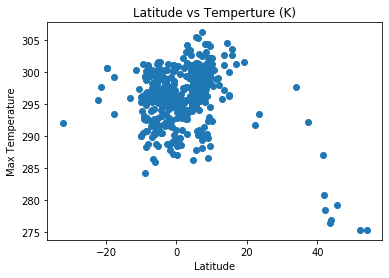

In [11]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.title("Latitude vs Temperture (K)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

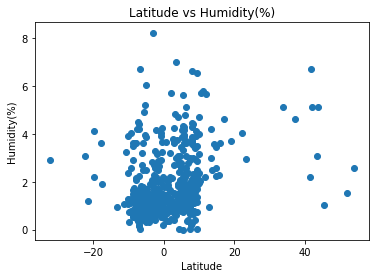

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("Latitude vs Humidity(%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

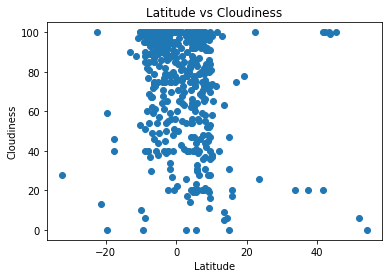

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

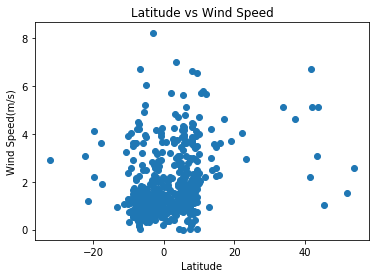

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Perform a linear regression on
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept
print(regress_values)

City_ID
0      2.422423
1      1.647800
2      2.079452
3      1.830498
4      2.097623
         ...   
470    1.965004
471    2.254249
472    1.538262
473    1.753242
474    1.656365
Name: Lat, Length: 475, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.04x +1.85


/Users/christian/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

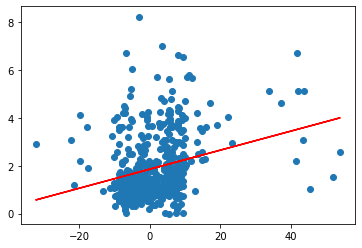

In [17]:
# Define a function to create Linear Regression plots
# Def regression_line(x, y):
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,champerico,14.3000,-91.9167,304.45,64,6,3.56,GT,1679959978
2,ugoofaaru,5.6667,73.0000,300.87,72,44,3.93,MV,1679959980
4,hambantota,6.1241,81.1185,298.68,81,56,1.45,LK,1679959981
7,yenagoa,4.9247,6.2642,298.41,88,97,1.67,NG,1679959983
8,bubaque,11.2833,-15.8333,298.85,70,73,5.79,GW,1679959673


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,touros,-5.1989,-35.4608,298.51,86,38,3.97,BR,1679959979
3,hithadhoo,-0.6000,73.0833,300.89,77,100,3.64,MV,1679959980
5,olinda,-8.0089,-34.8553,301.00,65,40,3.60,BR,1679959981
6,biharamulo,-2.6319,31.3089,288.73,97,92,1.72,TZ,1679959981
11,ambilobe,-13.2000,49.0500,295.91,96,90,0.96,MG,1679959633


###  Temperature vs. Latitude Linear Regression Plot

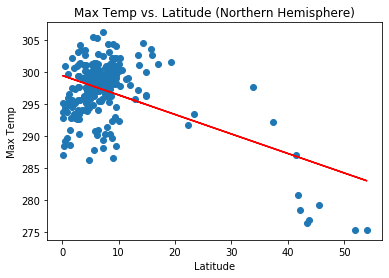

In [20]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# add the linear regression line to the plot
x = northern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Max Temp vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# display the plot
plt.show()

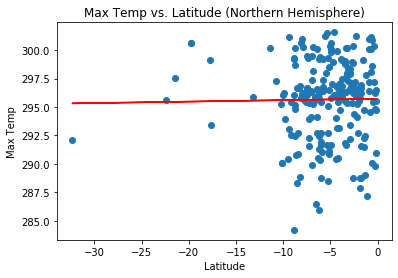

In [21]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# add the linear regression line to the plot
x = southern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Max Temp vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

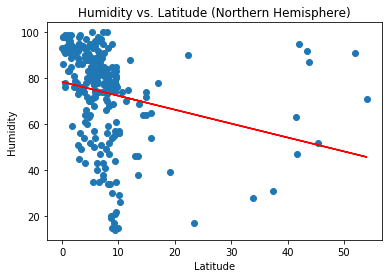

In [22]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# add the linear regression line to the plot
x = northern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Humidity vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# display the plot
plt.show()

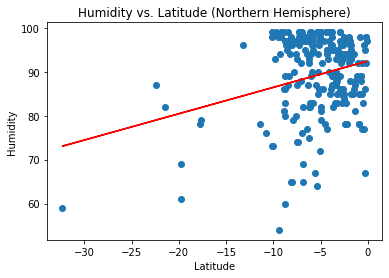

In [23]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# add the linear regression line to the plot
x = southern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Humidity vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

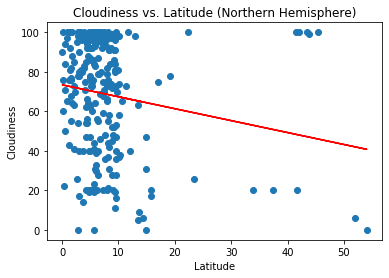

In [24]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# add the linear regression line to the plot
x = northern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# display the plot
plt.show()

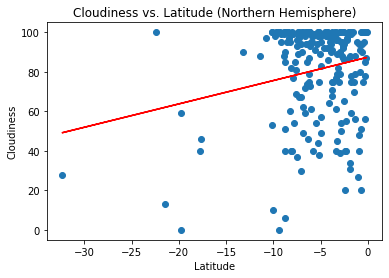

In [26]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# add the linear regression line to the plot
x = southern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Cloudiness vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

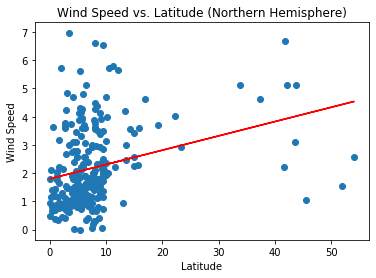

In [27]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# add the linear regression line to the plot
x = northern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# display the plot
plt.show()

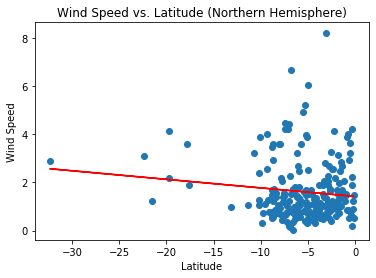

In [28]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# create a scatter plot of the Max Temp vs. Latitude data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# add the linear regression line to the plot
x = southern_hemi_df['Lat']
y = slope * x + intercept
plt.plot(x, y, color='red')

# set the plot title and labels
plt.title('Wind Speed vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE